# Import libraries
adalah mengimport packages dan modules yang digunakan: ```queue``` untuk struktur data, ```pyamaze``` untuk pembuatan maze,  ```networkx``` dan ```matplotlib``` untuk visualisasi tree-graph, sedangkan ```matplotlib.animation``` untuk membuat animasi pencarian solusi maze

In [ ]:
import queue
from pyamaze import maze,agent, COLOR,textLabel
import networkx as nx 
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Define function

1. Fungsi ```BFS```, berguna untuk mencari jalur dalam maze menggunakan metode Breadth-First Search

In [2]:
def BFS(m):
    start = (m.rows, m.cols)
    frontier = [start]
    explored = [start]
    bfsPath = {}
    while len(frontier)>0:
        currCell = frontier.pop(0)
        if currCell == (1,1):
            break
        for d in "ESNW":
            if m.maze_map[currCell][d]==True:
                if d=='E':
                    childCell=(currCell[0],currCell[1]+1)
                elif d=='W':
                    childCell=(currCell[0],currCell[1]-1)
                elif d=='N':
                    childCell=(currCell[0]-1,currCell[1])
                elif d=='S':
                    childCell=(currCell[0]+1,currCell[1])
                if childCell in explored:
                    continue
                frontier.append(childCell)
                explored.append(childCell)
                bfsPath[childCell]=currCell
    
    fwdPath={}
    cell=(1,1)
    while cell!=start:
        fwdPath[bfsPath[cell]]=cell
        cell=bfsPath[cell]
    return fwdPath, bfsPath

```fwdPath``` berisikan solusi maze sedangkan ```bfsPath``` berisikan hubungan antar-node berdasarkan metode BFS yang nantinya digunakan untuk membuat tree-graph

2. Fungsi ```DFS```, berguna untuk mencari solusi maze menggunakan metode Depth-First Search

In [3]:
def DFS(m):
    start=(m.rows,m.cols)
    explored=[start]
    frontier=[start]
    dfsPath={}
    while len(frontier)>0:
        currCell=frontier.pop()
        if currCell==(1,1):
            break
        for d in 'ESNW':
            if m.maze_map[currCell][d]==True:
                if d=='E':
                    childCell=(currCell[0],currCell[1]+1)
                elif d=='W':
                    childCell=(currCell[0],currCell[1]-1)
                elif d=='S':
                    childCell=(currCell[0]+1,currCell[1])
                elif d=='N':
                    childCell=(currCell[0]-1,currCell[1])
                if childCell in explored:
                    continue
                explored.append(childCell)
                frontier.append(childCell)
                dfsPath[childCell]=currCell
    fwdPath={}
    cell=(1,1)
    while cell!=start:
        fwdPath[dfsPath[cell]]=cell
        cell=dfsPath[cell]
    return fwdPath, dfsPath

```fwdPath``` berisikan solusi maze sedangkan ```dfsPath``` berisikan hubungan antar-node berdasarkan metode DFS yang nantinya digunakan untuk membuat tree-graph

3. Fungsi ```order_bfs``` dan ```order_dfs```, masing-masing digunakan untuk menghasilkan urutan (order) dari hubungan antar-node yang didapat dari fungsi ```BFS``` dan ```DFS``` dalam variabel ```bfsPath``` dan ```dfsPath``` secara berurutan

In [4]:
#BFS Tree Graph Algorithm
def order_bfs(graph, start_node):
     visited = set()
     q = queue.Queue()
     q.put(start_node)
     order = []

     while not q.empty():
          vertex = q.get()
          if vertex not in visited:
               order.append(vertex)
               visited.add(vertex)
               for node in graph[vertex]:
                    if node not in visited:
                         q.put(node)
     return order

#DFS Tree Graph Algorithm
def order_dfs(graph, start_node, visited=None):
    if visited is None:
        visited = set()

    order = []

    if start_node not in visited:
        order.append(start_node)
        visited.add(start_node)
        for node in graph[start_node]:
            if node not in visited:
                order.extend(order_dfs(graph, node, visited))
    
    return order

# Main Program

Pertama, adalah membuat maze dengan dimensi 5x5. Struktur maze yang dibuat berdasarkan yang telah di-generate sebelumnya di luar program. Hal ini untuk memudahkan pembuatan maze yang sama untuk dua metode yang berbeda.

In [5]:
# set a maze with dimension 5x5
m = maze(5,5)

# create the maze
m.CreateMaze(loopPercent=100, loadMaze=r"maze.csv")

# create an agent in the start node
a = agent(m,footprints=True,filled=True)

# display the maze
m.run()

Berikut adalah maze yang dibuat

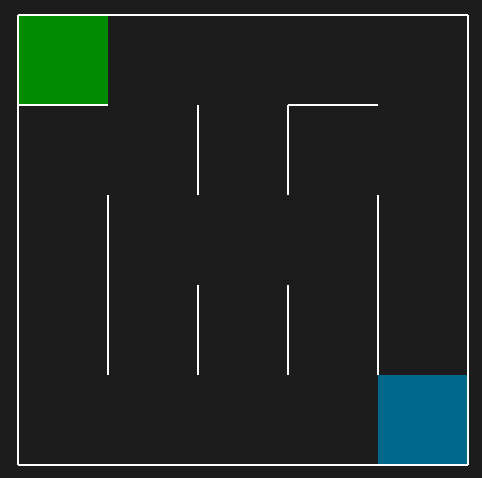

dengan struktur maze

In [6]:
m.maze_map

{(1, 1): {'E': 1, 'W': 0, 'N': 0, 'S': 0},
 (2, 1): {'E': 1, 'W': 0, 'N': 0, 'S': 1},
 (3, 1): {'E': 0, 'W': 0, 'N': 1, 'S': 1},
 (4, 1): {'E': 0, 'W': 0, 'N': 1, 'S': 1},
 (5, 1): {'E': 1, 'W': 0, 'N': 1, 'S': 0},
 (1, 2): {'E': 1, 'W': 1, 'N': 0, 'S': 1},
 (2, 2): {'E': 0, 'W': 1, 'N': 1, 'S': 1},
 (3, 2): {'E': 1, 'W': 0, 'N': 1, 'S': 1},
 (4, 2): {'E': 0, 'W': 0, 'N': 1, 'S': 1},
 (5, 2): {'E': 1, 'W': 1, 'N': 1, 'S': 0},
 (1, 3): {'E': 1, 'W': 1, 'N': 0, 'S': 1},
 (2, 3): {'E': 0, 'W': 0, 'N': 1, 'S': 1},
 (3, 3): {'E': 1, 'W': 1, 'N': 1, 'S': 1},
 (4, 3): {'E': 0, 'W': 0, 'N': 1, 'S': 1},
 (5, 3): {'E': 1, 'W': 1, 'N': 1, 'S': 0},
 (1, 4): {'E': 1, 'W': 1, 'N': 0, 'S': 0},
 (2, 4): {'E': 1, 'W': 0, 'N': 0, 'S': 1},
 (3, 4): {'E': 0, 'W': 1, 'N': 1, 'S': 1},
 (4, 4): {'E': 0, 'W': 0, 'N': 1, 'S': 1},
 (5, 4): {'E': 1, 'W': 1, 'N': 1, 'S': 0},
 (1, 5): {'E': 0, 'W': 1, 'N': 0, 'S': 1},
 (2, 5): {'E': 0, 'W': 1, 'N': 1, 'S': 1},
 (3, 5): {'E': 0, 'W': 0, 'N': 1, 'S': 1},
 (4, 5): {'

- Key dari dictionary menunjukkan titik koordinat (x, y)
- Value dari dictionary menunjukkan arah yang bisa ditempuh oleh tiap titik koordinat dengan E, W, N, dan S adalah arah ke kanan, ke kiri, ke atas, dan ke bawah secara berurutan 

## Running Maze with BFS

Kedua, runing maze menggunakan metode BFS dengan memanggil fungsi ``BFS`` yang hasilnya disimpan dalam variabel `fwdPath` dan `bfsPath`. Untuk menganimasikan perpindahan node, maka ditambahkan `m.tracePath`

In [13]:
# create the maze with saved data
m.CreateMaze(loopPercent=100, loadMaze=r"maze.csv")

# create an agent in the start node
a = agent(m,footprints=True,filled=True)

# get the maze solution and parent-child node relationship using BFS method
fwdPath, bfsPath = BFS(m)

# make the agent move along the maze solution based on BFS method
m.tracePath({a:fwdPath})

# add a label showing the length of the shortest path based on BFS method 
l = textLabel(m,'Panjang jalur terpendek pada metode BFS', len(fwdPath)+1)

# run Maze
m.run()

## Tree Graph Searching for BFS Method

Ketiga, membuat tree graph menggunakan metode BFS. Awalnya mencari solusi maze menggunakan fungsi ```BFS```. Lalu variabel ```bfsPath``` digunakan untuk menentukan hubungan antar-node dalam tree graph yang dibuat

MovieWriter Pillow unavailable; using Pillow instead.


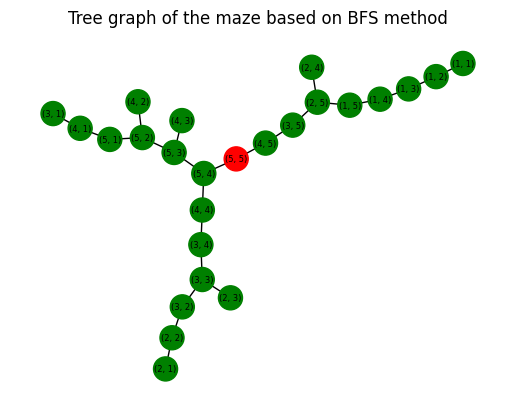

In [10]:
# create a graph
G = nx.Graph()

# initialize list H for the parent-child node relationship
H = []

# add the parent-child node to the list H
for child, parent in bfsPath.items():
    gabung = parent, child
    H.append(gabung)

# add edges of the graph G from nodes relationship
G.add_edges_from(H)

# set the layout of the graph, here we use spring_layout()
pos = nx.kamada_kawai_layout(G)

# search order based on bfs method
tree_bfs = order_bfs(G, H[0][0])

# setting the figure
fig, ax = plt.subplots(1,1)

# func animate to create animation
def animate(i):
   ax.clear()
   plt.title(title)
   nx.draw(G, pos, node_size=300, font_size=6, with_labels=True, node_color=['r' if n == tree_bfs[i] else 'g' for n in G.nodes]) 

# set the title of the figure
title = "Tree graph of the maze based on BFS method"

# create animation of the tree graph
ani = FuncAnimation(fig, animate, frames=len(tree_bfs), interval=500)

# save the animation in .gif format
ani.save('tree-graph-bfs.gif', writer='Pillow', fps=1, dpi=300)

## Running Maze with DFS

Keempat, runing maze menggunakan metode BFS dengan memanggil fungsi ``DFS`` yang hasilnya disimpan dalam variabel `fwdPath` dan `bfsPath`. Untuk menganimasikan perpindahan node, maka ditambahkan `m.tracePath`

In [11]:
# create the maze with saved data
m.CreateMaze(loopPercent=100, loadMaze=r"maze.csv")

# create an agent in the start node
a = agent(m,footprints=True,filled=True)

# get the maze solution and parent-child node relationship using BFS method
fwdPath, dfsPath = DFS(m)

# make the agent move along the maze solution based on BFS method
m.tracePath({a:fwdPath})

# add a label showing the length of the shortest path based on BFS method 
l = textLabel(m,'Panjang jalur terpendek pada metode DFS', len(fwdPath)+1)

# run Maze
m.run()

## Searching for Tree Graph with DFS

Ketiga, membuat tree graph menggunakan metode DFS. Awalnya mencari solusi maze menggunakan fungsi ```DFS```. Lalu variabel ```dfsPath``` digunakan untuk menentukan hubungan antar-node dalam tree graph yang dibuat

MovieWriter Pillow unavailable; using Pillow instead.


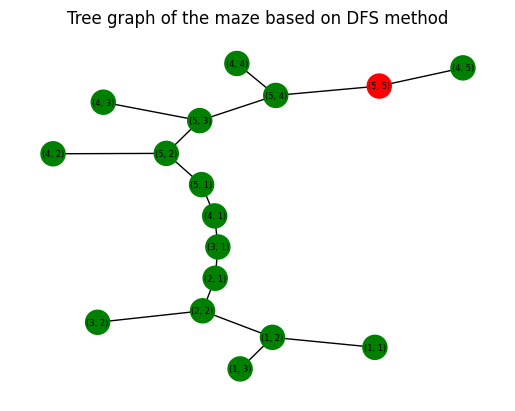

In [12]:
# create a graph
G = nx.Graph()

# initialize list H for the parent-child node relationship
H = []

# add the parent-child node to the list H
for child, parent in dfsPath.items():
    gabung = parent, child
    H.append(gabung)

# add edges of the graph G from nodes relationship
G.add_edges_from(H)

# set the layout of the graph, here we use spring_layout()
pos = nx.kamada_kawai_layout(G)

# search order based on bfs method
tree_dfs = order_dfs(G, H[0][0])

# setting the figure
fig, ax = plt.subplots(1,1)

# func animate to create animation
def animate(i):
   ax.clear()
   plt.title(title)
   nx.draw(G, pos, node_size=300, font_size=6, with_labels=True, node_color=['r' if n == tree_dfs[i] else 'g' for n in G.nodes]) 

# set the title of the figure
title = "Tree graph of the maze based on DFS method"

# create animation of the tree graph
ani = FuncAnimation(fig, animate, frames=len(tree_dfs), interval=500)

# save the animation in .gif format
ani.save('tree-graph-dfs.gif', writer='Pillow', fps=1, dpi=300)